In [1]:
from urllib.parse import urlsplit
from soft404.train import reader

In [12]:
links = 0
mangled = 0
accidental_404 = 0
hard_404 = 0
soft_404 = []
for item in reader('../pages_tiny.jl.gz'):
    is_link = urlsplit(item['url']).path.rstrip('/')
    if is_link:  # home page should not give a 404
        links += 1
        if item['mangled_url']:
            mangled += 1
            if item['status'] == 404:
                hard_404 += 1
            elif item['status'] == 200:
                soft_404.append(item)
        elif item['status'] == 404:
            accidental_404 += 1
        
print('{links} links, {hard_404} hard 404, {accidental_404} accidental 404, {soft_404} soft 404'
     .format(links=links,
             hard_404=hard_404,
             accidental_404=accidental_404,
             soft_404=len(soft_404),
            ))

7919 links, 1453 hard 404, 130 accidental 404, 278 soft 404


In [13]:
prob_accidental_404 = accidental_404 / (links - mangled)
cond_prob_soft_404 = len(soft_404) / mangled
prob_soft_404 = prob_accidental_404 * cond_prob_soft_404

print('Probability of a link being 404: {:.2%}, of a link being a soft 404 (unconditional): {:.2%}'
      .format(prob_accidental_404, prob_soft_404))

Probability of a link being 404: 2.10%, of a link being a soft 404 (unconditional): 0.34%


In [19]:
import pandas as pd
%matplotlib inline
from soft404 import Soft404Classifier

clf = Soft404Classifier(soft404_prior=0.25)

In [20]:
soft404_probs = [clf.predict(item['html']) for item in soft_404]

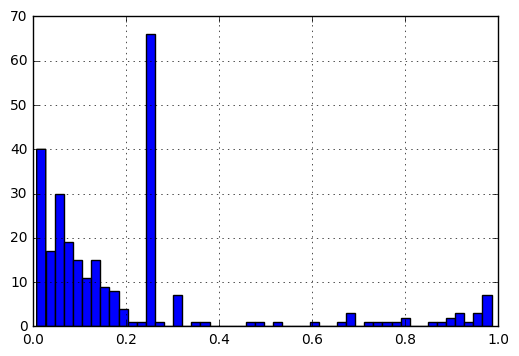

In [21]:
pd.Series(soft404_probs).hist(bins=50)

In [22]:
item_probs = sorted(zip(soft_404, soft404_probs), key=lambda x: x[1], reverse=True)

In [26]:
for item, prob in item_probs:
    print(prob, item['url'])

0.9858119564555415 http://www.bt.com/sorrypages/sorry/platform/404error.html?errpage=true
0.9852252105706313 https://bbpress.org/forums/profile/mnimbelli/
0.9852252105706313 https://bbpress.org/forums/profile/titis14c/
0.9795285422494846 https://ssl.palmcoastd.com/13201/apps/-2a13596
0.9724665039877215 https://hockeyapp.net/features/crashrepsorts/?utm_campaign=HOCKEYAPP&utm_medium=WEBCONTENT&utm_source=VSCOM&utm_term=CRASHREPORTS&wt.mc_id=p_OLA_WebContent_VSCOM_CRASHREPORTS_HOCKEYAPP
0.9724665039877215 https://hockeyapp.net/features/cdistribution/?utm_campaign=HOCKEYAPP&utm_medium=WEBCONTENT&utm_source=VSCOM&utm_term=DISTRIBUTION&wt.mc_id=p_OLA_WebContent_VSCOM_DISTRIBUTION_HOCKEYAPP
0.9722550944317883 https://www.theatlas.com/serarch
0.9636251932923677 http://www.magzter.com/preview/10333/1837d99
0.9539606911061945 http://www.eastoregonrealestate.com/featured_agent.htmpl?feature=FEATUREDAGENT
0.950863179886597 http://www.guangyuanol.cn/appx/
0.9357284058462493 https://status.twitterst